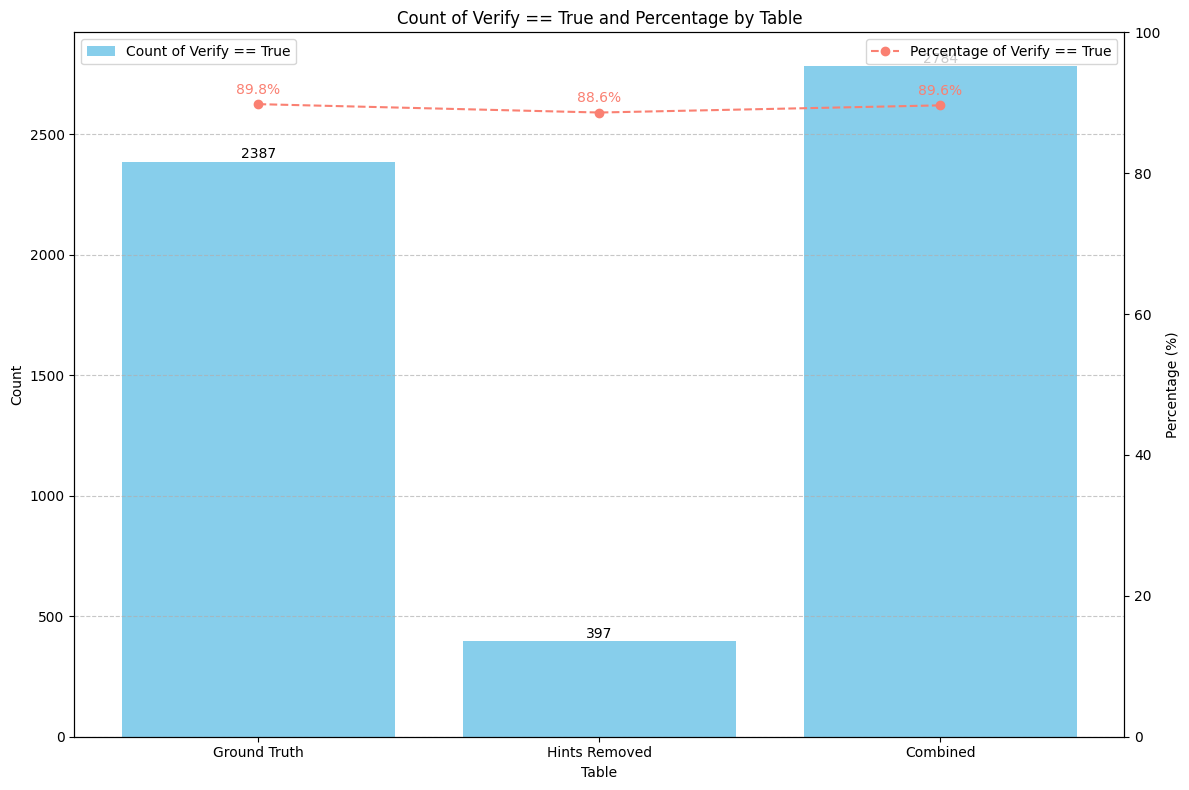

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar as tabelas
ground_truth_df = pd.read_csv("dataset/DafnyBench/ground_truth/Tables/fault_loc_table.csv")
hints_removed_df = pd.read_csv("dataset/DafnyBench/hints_removed/Tables/fault_loc_table.csv")

# Função para contar Verify == True e calcular a porcentagem
def count_verify(df):
    # Contar a quantidade de True e False na coluna 'Verify'
    verify_counts = df['Verify'].value_counts()
    true_count = verify_counts.get(True, 0)
    total_count = len(df)
    true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0
    return true_count, true_percentage

# Contar Verify == True e porcentagem para cada tabela
true_count_ground_truth, true_percentage_ground_truth = count_verify(ground_truth_df)
true_count_hints_removed, true_percentage_hints_removed = count_verify(hints_removed_df)

# Combinar as tabelas
combined_df = pd.concat([ground_truth_df, hints_removed_df])

# Contar Verify == True e porcentagem para a combinação
true_count_combined, true_percentage_combined = count_verify(combined_df)

# Criar um DataFrame com todos os resultados
resultados = pd.DataFrame({
    'Table': ['Ground Truth', 'Hints Removed', 'Combined'],
    'Count': [true_count_ground_truth, true_count_hints_removed, true_count_combined],
    'Percentage': [true_percentage_ground_truth, true_percentage_hints_removed, true_percentage_combined]
})

# Criar o gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfico de barras para a quantidade de True
bars = ax1.bar(resultados['Table'], resultados['Count'], color='skyblue', label='Count of Verify == True')

# Adicionar números sobre as barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height), ha='center', va='bottom')

ax1.set_title('Count of Verify == True and Percentage by Table')
ax1.set_xlabel('Table')
ax1.set_ylabel('Count')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Criar um segundo eixo y para a porcentagem
ax2 = ax1.twinx()
ax2.plot(resultados['Table'], resultados['Percentage'], color='salmon', marker='o', linestyle='--', label='Percentage of Verify == True')
ax2.set_ylabel('Percentage (%)')
ax2.set_ylim(0, 100)

# Adicionar números sobre as linhas de porcentagem
for i, percent in enumerate(resultados['Percentage']):
    ax2.text(i, percent + 1, f"{percent:.1f}%", ha='center', va='bottom', color='salmon')

# Adicionar legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


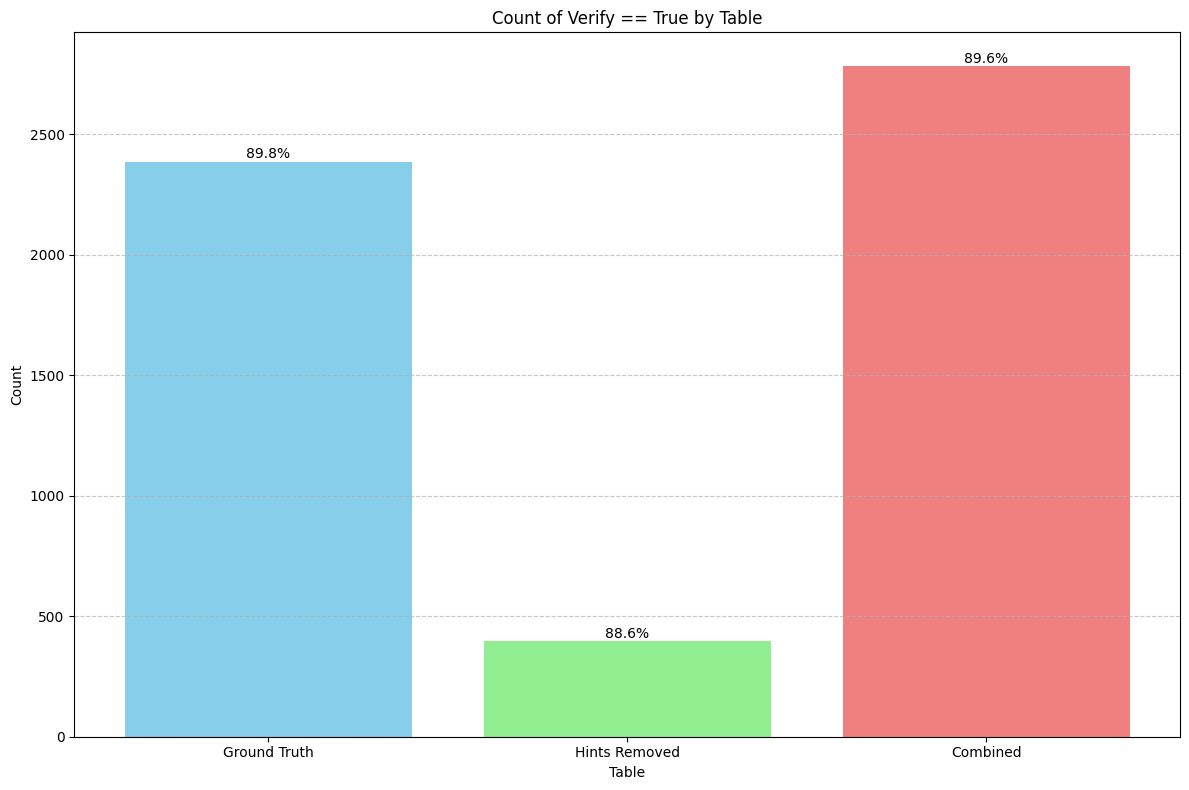

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar as tabelas
ground_truth_df = pd.read_csv("dataset/DafnyBench/ground_truth/Tables/fault_loc_table.csv")
hints_removed_df = pd.read_csv("dataset/DafnyBench/hints_removed/Tables/fault_loc_table.csv")

# Função para contar Verify == True e calcular a porcentagem
def count_verify(df):
    # Contar a quantidade de True e False na coluna 'Verify'
    verify_counts = df['Verify'].value_counts()
    true_count = verify_counts.get(True, 0)
    total_count = len(df)
    true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0
    return true_count, true_percentage

# Contar Verify == True e porcentagem para cada tabela
true_count_ground_truth, true_percentage_ground_truth = count_verify(ground_truth_df)
true_count_hints_removed, true_percentage_hints_removed = count_verify(hints_removed_df)

# Combinar as tabelas
combined_df = pd.concat([ground_truth_df, hints_removed_df])

# Contar Verify == True e porcentagem para a combinação
true_count_combined, true_percentage_combined = count_verify(combined_df)

# Criar um DataFrame com todos os resultados
resultados = pd.DataFrame({
    'Table': ['Ground Truth', 'Hints Removed', 'Combined'],
    'Count': [true_count_ground_truth, true_count_hints_removed, true_count_combined],
    'Percentage': [true_percentage_ground_truth, true_percentage_hints_removed, true_percentage_combined]
})

# Definir cores para as barras
colors = ['skyblue', 'lightgreen', 'lightcoral']  # Cores diferentes para cada tabela

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(resultados['Table'], resultados['Count'], color=colors)

# Adicionar porcentagens acima das barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = resultados['Percentage'].iloc[i]  # Obter a porcentagem correspondente
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center', va='bottom')

plt.title('Count of Verify == True by Table')
plt.xlabel('Table')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


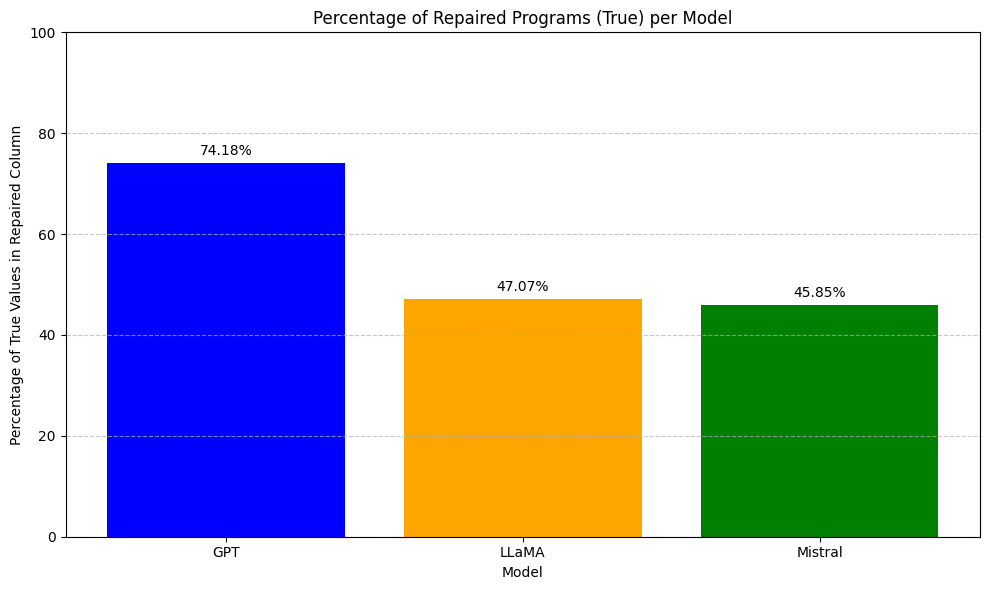

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the CSV files
gpt_files = [
    r"dataset\DafnyBench\hints_removed\Tables\repair_gpt_table.csv",
    r"dataset\DafnyBench\ground_truth\Tables\repair_gpt_table.csv"
]

llama_files = [
    r"dataset\DafnyBench\hints_removed\Tables\repair_llama_table.csv",
    r"dataset\DafnyBench\ground_truth\Tables\repair_llama_table.csv"
]

mistral_files = [
    r"dataset\DafnyBench\hints_removed\Tables\repair_mistral_table.csv",
    r"dataset\DafnyBench\ground_truth\Tables\repair_mistral_table.csv"
]

# Function to combine data and calculate the percentage of True values
def calculate_true_percentage(files):
    combined_df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
    true_count = combined_df['Repaired'].sum()
    total_count = combined_df['Repaired'].count()
    percentage = (true_count / total_count) * 100
    return percentage

# Calculate the percentages for each model
gpt_percentage = calculate_true_percentage(gpt_files)
llama_percentage = calculate_true_percentage(llama_files)
mistral_percentage = calculate_true_percentage(mistral_files)

# Data for the bar chart
models = ['GPT', 'LLaMA', 'Mistral']
percentages = [gpt_percentage, llama_percentage, mistral_percentage]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, percentages, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Percentage of True Values in Repaired Column')
plt.title('Percentage of Repaired Programs (True) per Model')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


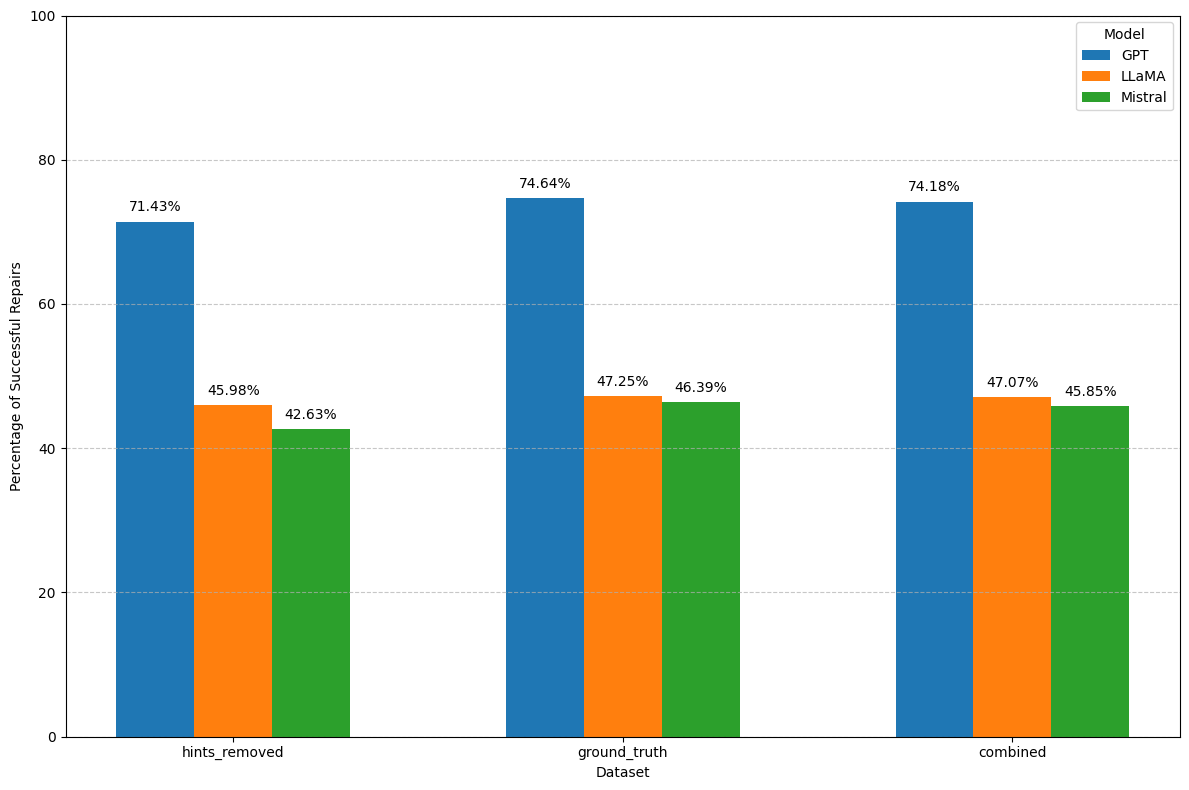

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the CSV files
gpt_files = {
    "hints_removed": r"dataset\DafnyBench\hints_removed\Tables\repair_gpt_table.csv",
    "ground_truth": r"dataset\DafnyBench\ground_truth\Tables\repair_gpt_table.csv"
}

llama_files = {
    "hints_removed": r"dataset\DafnyBench\hints_removed\Tables\repair_llama_table.csv",
    "ground_truth": r"dataset\DafnyBench\ground_truth\Tables\repair_llama_table.csv"
}

mistral_files = {
    "hints_removed": r"dataset\DafnyBench\hints_removed\Tables\repair_mistral_table.csv",
    "ground_truth": r"dataset\DafnyBench\ground_truth\Tables\repair_mistral_table.csv"
}

# Function to calculate the percentage of True values
def calculate_true_percentage(file):
    df = pd.read_csv(file)
    true_count = df['Repaired'].sum()
    total_count = df['Repaired'].count()
    percentage = (true_count / total_count) * 100
    return percentage

# Calculate the percentages for each model and dataset
gpt_percentages = {key: calculate_true_percentage(path) for key, path in gpt_files.items()}
llama_percentages = {key: calculate_true_percentage(path) for key, path in llama_files.items()}
mistral_percentages = {key: calculate_true_percentage(path) for key, path in mistral_files.items()}

# Calculate combined percentages
def calculate_combined_percentage(files):
    combined_df = pd.concat([pd.read_csv(file) for file in files.values()], ignore_index=True)
    true_count = combined_df['Repaired'].sum()
    total_count = combined_df['Repaired'].count()
    percentage = (true_count / total_count) * 100
    return percentage

gpt_percentages['combined'] = calculate_combined_percentage(gpt_files)
llama_percentages['combined'] = calculate_combined_percentage(llama_files)
mistral_percentages['combined'] = calculate_combined_percentage(mistral_files)

# Data for the bar chart
datasets = ['hints_removed', 'ground_truth', 'combined']
models = ['GPT', 'LLaMA', 'Mistral']
percentages = [gpt_percentages, llama_percentages, mistral_percentages]

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.2  # Width of each bar
x = range(len(datasets))  # X-axis positions for each group

for i, model in enumerate(models):
    model_percentages = [percentages[i][dataset] for dataset in datasets]
    ax.bar([pos + i*width for pos in x], model_percentages, width=width, label=model)

# Add labels, title, and legend
ax.set_xlabel('Dataset')
ax.set_ylabel('Percentage of Successful Repairs')
#ax.set_title('Percentage of Repaired Programs (True) by Model and Dataset')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(datasets)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Model')

# Add percentage labels on top of the bars
for i, model in enumerate(models):
    model_percentages = [percentages[i][dataset] for dataset in datasets]
    for j, percentage in enumerate(model_percentages):
        ax.text(j + i*width, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the CSV files for models
model_files = {
    "GPT4_ground_truth": r"dataset\EvaluationDataset\ground_truth\Tables\repair_gpt_table.csv",
    "GPT4_hints_removed": r"dataset\EvaluationDataset\hints_removed\Tables\repair_gpt_table.csv",
    "Llama_ground_truth": r"dataset\EvaluationDataset\ground_truth\Tables\repair_llama_table.csv",
    "Llama_hints_removed": r"dataset\EvaluationDataset\hints_removed\Tables\repair_llama_table.csv",
    "Mistral_ground_truth": r"dataset\EvaluationDataset\ground_truth\Tables\repair_mistral_table.csv",
    "Mistral_hints_removed": r"dataset\EvaluationDataset\hints_removed\Tables\repair_mistral_table.csv"
}

# Paths for fault_loc_table files to calculate total Verify=False
fault_loc_files = [
    r"dataset\EvaluationDataset\hints_removed\Tables\fault_loc_table.csv",
    r"dataset\EvaluationDataset\ground_truth\Tables\fault_loc_table.csv"
]

# Dictionary to store counts for Verify=False and Repaired=True per model
model_counts = {"GPT4": 0, "Llama": 0, "Mistral": 0}

# Variable to store total Verify=False count from fault_loc_table (ignoring Name='check')
total_verify_false = 0

# Process each model file
for model in model_counts.keys():
    ground_truth_file = model_files[f"{model}_ground_truth"]
    hints_removed_file = model_files[f"{model}_hints_removed"]
    
    # Read ground truth and hints removed tables
    df_ground_truth = pd.read_csv(ground_truth_file)
    df_hints_removed = pd.read_csv(hints_removed_file)
    
    # Filter out rows where Name is 'check'
    df_ground_truth = df_ground_truth[df_ground_truth['Name'] != 'check']
    df_hints_removed = df_hints_removed[df_hints_removed['Name'] != 'check']
    
    # Count where Verify=False and Repaired=True for both tables
    ground_truth_count = ((df_ground_truth['Verify'] == False) & (df_ground_truth['Repaired'] == True)).sum()
    hints_removed_count = ((df_hints_removed['Verify'] == False) & (df_hints_removed['Repaired'] == True)).sum()
    
    # Store the total count for each model (Verify=False and Repaired=True)
    model_counts[model] = ground_truth_count + hints_removed_count

# Calculate total Verify=False from fault_loc_table CSVs (ignoring Name='check')
for fault_loc_file in fault_loc_files:
    df_fault_loc = pd.read_csv(fault_loc_file)
    
    # Filter out rows where Name is 'check'
    df_fault_loc = df_fault_loc[df_fault_loc['Name'] != 'check']
    
    # Count where Verify=False
    total_verify_false += (df_fault_loc['Verify'] == False).sum()

# Add 'Total' to represent total Verify=False (from fault_loc tables)
model_counts['Total'] = total_verify_false

# Define the colors: same for models, green for Total
colors = ['blue', 'blue', 'blue', 'green']

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(model_counts.keys(), model_counts.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Count')
#plt.title('Counts of Verify=False and Repaired=True by Model, and Total Verify=False (ignoring Name="check")')

# Add number counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Save and show the plot
plt.tight_layout()
plt.savefig('verify_false_and_repaired_true_with_total_bar_plot.png')
plt.show()
